Decision Trees are similar to SVMs in that they can perform both regression and classification tasks, along with multioutput tasks. The Random Forest algorithm, a very powerful ensemble algorithm, is constructed using a number of Decision Trees.

Topics:
- Training & Visualization
- The CART Training Algorithm
- Regularization
- Limitations

# Training & Visualization

We will demonstrate a Decision Tree using the iris dataset.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

# Use petal length and width
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

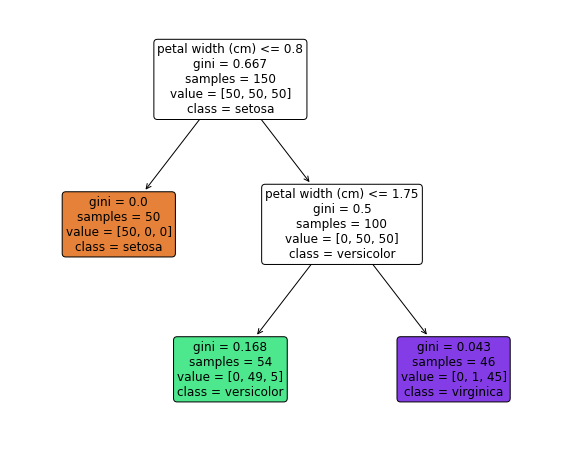

In [2]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def plot_tree_clf(tree_clf):
    plt.figure(figsize=(10,8))
    plot_tree(
        tree_clf,
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True,
        fontsize=12
    )
    plt.show()

plot_tree_clf(tree_clf)

## Making Predictions

Each instance begins at the root node and is checked against a condition. The instance moves to the left child node if the condition is met, and the right otherwise. Leaf nodes represent predictions.

Nodes are made up of the following:

- A condition (except leaf), will be true or false for each instance.
- **gini**: a score that reflects a node's impurity. A node is considered pure (gini=0) if all applicable instances belong to the same class.
- **samples**: the total number of applicable instances.
- **value**: the number of applicable instances separated by class.
- **class**: best prediction for the node.

*Equation 1: Gini impurity*

\begin{equation*}
G_i = 1 - \sum_{k=1}^n p_{i,k}^2
\end{equation*}

- $p_{i,k}$ is the ratio of $k$ instances among the samples in the $i^{th}$ node

In the decision tree above, the depth-2 left node (green) has $G = 1 - (0/54)^2 - (49/54)^2 - (5/54)^2 \approx 0.168$.

Increasing the maximum depth can improve some of the leaf node gini scores, but can also generate ambiguous nodes with few samples.

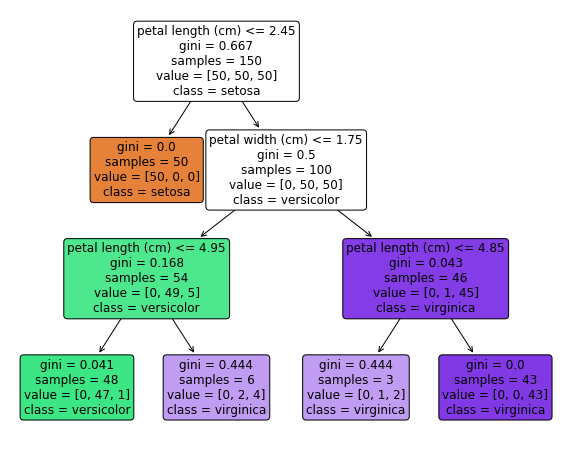

In [3]:
# Example with increased maximum depth
tree_clf_3 = DecisionTreeClassifier(max_depth=3)
tree_clf_3.fit(X, y)

plot_tree_clf(tree_clf_3)

## Estimating Class Probabilities

Decision trees can estimate the probability that an instance belongs to class $k$ by traversing the tree until it reaches its respective leaf node $i$ and returning the value ratios $p_{i,k}$. The class with the highest probability will be the returned prediction.

In [4]:
# Class probabilities for an instance with 5 cm petal length, 1.5 cm petal width
dict(zip(iris.target_names, tree_clf.predict_proba([[5, 1.5]])[0]))

{'setosa': 0.0,
 'versicolor': 0.9074074074074074,
 'virginica': 0.09259259259259259}

In [5]:
# Class prediction
iris.target_names[tree_clf.predict([[5, 1.5]])]

array(['versicolor'], dtype='<U10')

# The CART Training Algorithm

The CART (Classification and Regression Tree) algorithm splits the training set into two subsets based on feature $k$ and threshold $t_k$ (e.g., petal length $\leq$ 2.45 cm). $k$ and $t_k$ are determined via search for the values that produce the purest subsets.

*Equation 2: CART cost function for classification*

\begin{equation*}
J(k, t_k) = \frac{m_\text{left}}{m} G_\text{left} + \frac{m_\text{right}}{m} G_\text{right}
\end{equation*}

where:

- $G_\text{left/right}$ measures the impurity of the left/right subset
- $m_\text{left/right}$ is the number of instances in the left/right subset

In addition to the gini score, entropy can be used to measure impurity.

*Equation 3: Entropy*

\begin{equation*}
H_i = \sum_\underset{P_{i,k}=0}{k=1}^n P_{i,k} \text{log}_2 (p_{i,k})
\end{equation*}

## Regularization

The CART alogrithm continues recursively for each subset until a stop condition is met or it fails to find a split that reduces impurity. Stop conditions can be set with hyperparameters to regularize the model:

- **max_depth**: the algorithm will stop when a specified depth is reached
- **min_samples_split**: the algorithm will stop when the number of samples in a node falls below some threshold
- **min_samples_leaf**: the algorithm will stop when a leaf node has samples below some threshold
- **min_weight_fraction_leaf**: the algorithm will stop when a leaf node has a ratio of weighted samples below some threshold
- **max_leaf_nodes**: the algorithm will stop when the number of leaf nodes exceeds some threshold